Packages

In [1]:
import numpy as np
import pylab as pl

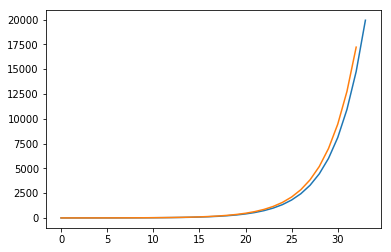

In [17]:
# step size
dx = 0.3

# x-range
x = np.arange(0, 10, dx)

# function
y = np.exp(x)

# plot function
pl.plot(y)

# derivative
dydx = np.diff(y)/dx

# plot derivative
pl.plot(dydx)

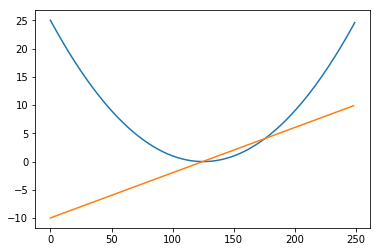

In [20]:
# step size
dx = 0.04

# x-range
x = np.arange(0, 10, dx)

# function
y = (x - 5)**2

# plot function
pl.plot(y)

# derivative
dydx = np.diff(y)/dx

# plot derivative
pl.plot(dydx)

In [19]:
# step size
dx = 0.001

# interval max. value
xend = 5

# x values
x = np.arange(0, xend, dx)

# function
y = (x + 0.5 * dx - 5)**2

# integral for y
AUC = np.sum(y * dx)

print(AUC)

41.66666625


Integrate-and-fire neuron

In [7]:
# time step
delta = 0.002
dt = 0.001 
# time steps
iterations = 300
# step
x = np.arange(0, iterations) * dt
# resting potential (mV)
V_rest = -70
# mebrane resistance
R = 1 
# membrane time constant (whole cell)
tau_m = 0.04 
# external input in (mA)
I = 20
Iest = 0
# starting potential (mV)
V0 = 0 
# array containing voltages 
voltages = np.zeros(iterations)
# reset
reset = -80
T = -63
# spike times
spikeTime = np.zeros(iterations)
IestTime = np.zeros(iterations)
ITime = np.ones(iterations) * I

Iterates over n time steps with a given input

Text(0,0.5,'current (in mA)')

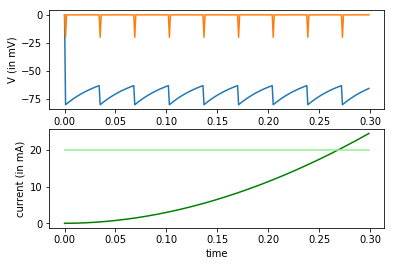

In [9]:
for i in range(1, iterations):
    
    # update voltage using Euler's method
    dVdt = (-(voltages[i - 1] - V_rest) + R * I) / tau_m
    voltages[i] = voltages[i - 1] + dt * dVdt
    
    # update input estimate using Euler's method
    dIdt = - IestTime[i - 1] + np.sum(delta * (i - spikeTime))
    IestTime[i] = IestTime[i - 1] + dt * dIdt
    
    if voltages[i] > T:
        
        # update voltage 
        voltages[i] = reset
        spikeTime[i] = -20

# plot voltage and spike times
pl.subplot(2, 1, 1)
pl.plot(x, voltages)
pl.plot(x, spikeTime)
pl.ylabel('V (in mV)')

# plot input and input estimate
pl.subplot(2, 1, 2)
pl.plot(x, IestTime, color='green')
pl.plot(x, ITime, color='lightgreen')
pl.xlabel('time')
pl.ylabel('current (in mA)')